In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats

In [2]:
np.random.seed(47)
grades = np.random.randint(1,7, 60)
freq_dict = {i: np.sum(grades == i) for i in range(1, 7)}
freq_dict

{1: 8, 2: 13, 3: 10, 4: 12, 5: 10, 6: 7}

In [3]:
df = pd.DataFrame.from_dict(freq_dict, orient='index', columns=['abs_freq'])
df.index.name = 'grades'

In [4]:
df

,abs_freq
grades,
1,8
2,13
3,10
4,12
5,10
6,7


In [5]:
df['rel_freq'] = round(df['abs_freq'] / len(grades), 3)
df['abs_cum_freq'] = df['abs_freq'].cumsum()
df['rel_cum_freq'] = round(df['rel_freq'].cumsum(), 2)

In [6]:
df

,abs_freq,rel_freq,abs_cum_freq,rel_cum_freq
grades,,,,
1,8,0.133,8,0.13
2,13,0.217,21,0.35
3,10,0.167,31,0.52
4,12,0.200,43,0.72
5,10,0.167,53,0.88
6,7,0.117,60,1.00


In [7]:
df['abs_freq']

grades
1     8
2    13
3    10
4    12
5    10
6     7
Name: abs_freq, dtype: int32

In [8]:
#recreating the grades list from the df

abs_freq = df['abs_freq'].values

grades2 = []
for grade, freq in enumerate(abs_freq, start=1):
    grades2.extend([grade] * freq)
    
grades2 = np.array(grades2)
np.unique(grades2, return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([ 8, 13, 10, 12, 10,  7], dtype=int64))

In [9]:
grades_arr = df.index.values
abs_freq_arr = df['abs_freq'].values

grades_arr, abs_freq_arr

(array([1, 2, 3, 4, 5, 6], dtype=int64), array([ 8, 13, 10, 12, 10,  7]))

In [10]:
np.average(grades_arr, weights=abs_freq_arr)

3.4

In [11]:
a = 0

for i in df.index:
    a += i * df['abs_freq'][i]
    
avg_grade = a/sum(df['abs_freq'])
avg_grade

3.4

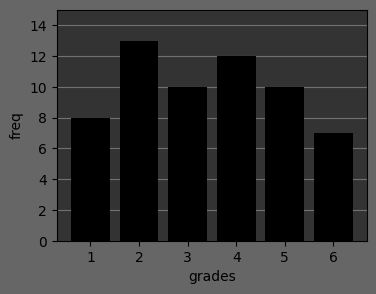

In [37]:
plt.figure(facecolor='0.4', figsize=(4,3))
plt.axes().set_facecolor('.2')
plt.bar(grades_arr, abs_freq_arr, color='black', zorder=2)
plt.ylim(0,15)
plt.xlabel('grades')
plt.ylabel('freq')
plt.grid(axis='y', zorder=1, alpha=.5)
plt.show()

In [26]:
X = grades2
s = list(map(lambda x: 10 * len(X[X == x]), X))

def boxplot(data):
    '''Input data has to be a list of positive numbers'''
    
    print(scipy.stats.describe(data))
    
    mean   = statistics.fmean(data)
    hmean  = statistics.harmonic_mean(data)
    gmean  = statistics.geometric_mean(data)
    median = statistics.median(data)
    
    plt.figure(facecolor='0.2',figsize=(10,1.1),dpi=300)
    plt.axes().set_facecolor('.4')
    plt.axis([min(data)-2,max(data)+2,-0.5,0.5])

    plt.scatter(data,np.zeros(len(data)),color = 'black',s=s,zorder=2)
    plt.axvline(x = gmean,color='red', linestyle='--',label='gmean')
    plt.axvline(x = hmean,color='blue', linestyle='--',zorder=1,label='hmean')
    plt.axvline(x = mean,color='purple', linestyle='--',label='armean')
    plt.axvline(x = median,color='yellow', linestyle='--',label='median')
    
    plt.yticks(np.arange(0))
    plt.legend(loc='lower right',prop={'size': 3})
    plt.legend().get_frame().set_alpha(0.1)
    plt.grid(alpha=.8)
    plt.show()

DescribeResult(nobs=60, minmax=(1, 6), mean=3.4, variance=2.549152542372881, skewness=0.08264735608339, kurtosis=-1.1363739248528744)


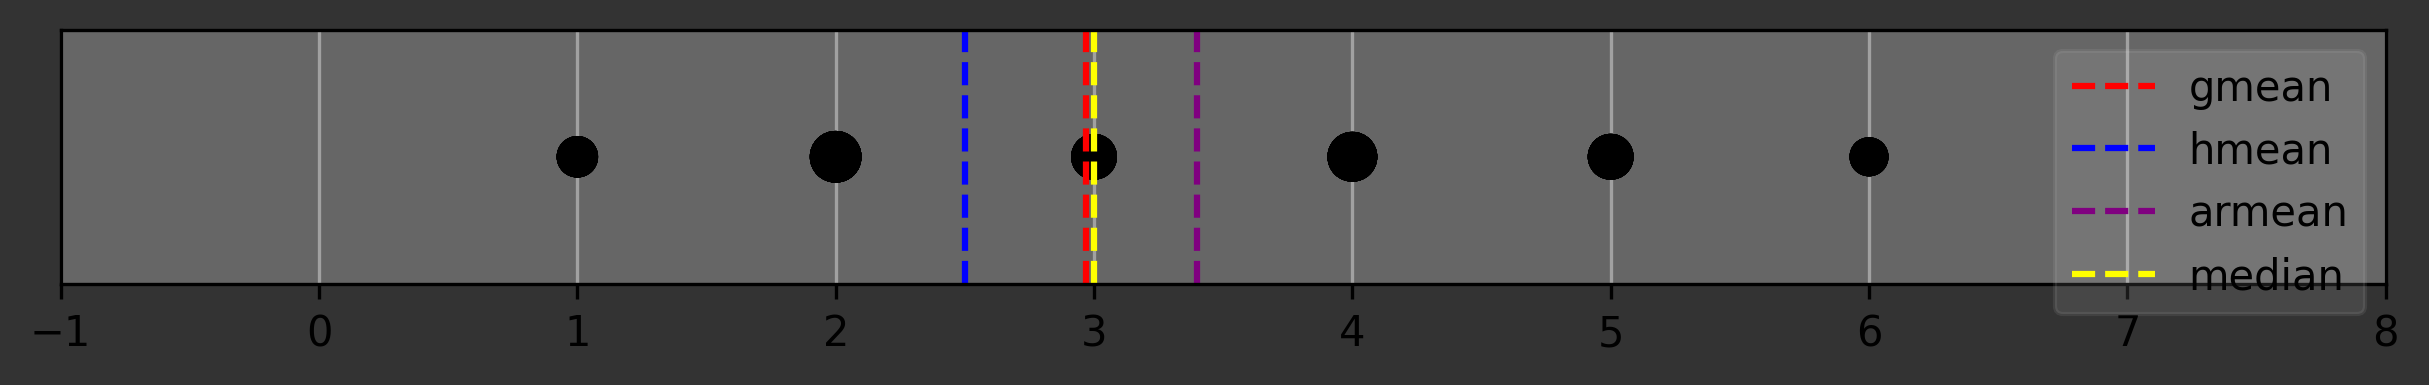

In [27]:
boxplot(grades2)

In [28]:
grades

array([1, 1, 4, 1, 4, 1, 6, 2, 3, 3, 3, 4, 2, 4, 5, 1, 2, 3, 2, 2, 6, 1,
       2, 5, 3, 1, 3, 2, 5, 4, 5, 6, 2, 2, 2, 4, 6, 4, 6, 4, 3, 2, 3, 1,
       4, 2, 6, 5, 4, 6, 5, 5, 3, 4, 2, 3, 5, 5, 5, 4])